In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("Western_UP_5_Districts_Irrigation_Data.csv", parse_dates=["date"])

# Encode categorical variables
df["crop"] = LabelEncoder().fit_transform(df["crop"])
df["district"] = LabelEncoder().fit_transform(df["district"])

# Feature selection
features = ["temperature_C", "precip_mm", "wind_m_s", "solar_rad_MJ_m2", 
            "soil_moisture", "crop", "district", "month"]
df["month"] = df["date"].dt.month
target = "electricity_kWh"

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ MAE: {mae:.2f} kWh")
print(f"✅ R² Score: {r2:.2f}")


✅ MAE: 0.00 kWh
✅ R² Score: 1.00


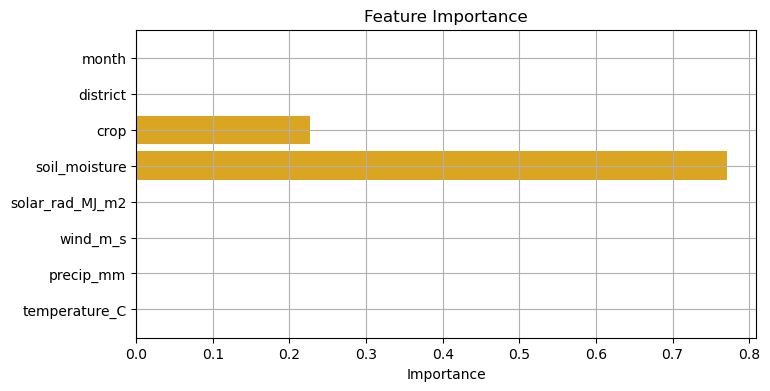

In [2]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances, color='goldenrod')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.grid(True)
plt.show()


In [3]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"📉 Mean Absolute Error (MAE): {mae:.3f} kWh")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.3f} kWh")
print(f"📈 R² Score: {r2:.3f}")


📉 Mean Absolute Error (MAE): 0.003 kWh
📉 Root Mean Squared Error (RMSE): 0.096 kWh
📈 R² Score: 0.997


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#from xgboost import XGBRegressor

models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
   # "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds, squared=False)
    print(f"\n🔍 {name}")
    print(f"   MAE:  {mae:.3f} kWh")
    print(f"   RMSE: {rmse:.3f} kWh")
    print(f"   R²:   {r2:.3f}")



🔍 Random Forest
   MAE:  0.003 kWh
   RMSE: 0.096 kWh
   R²:   0.997

🔍 Linear Regression
   MAE:  1.133 kWh
   RMSE: 1.315 kWh
   R²:   0.528

🔍 Decision Tree
   MAE:  0.001 kWh
   RMSE: 0.074 kWh
   R²:   0.998


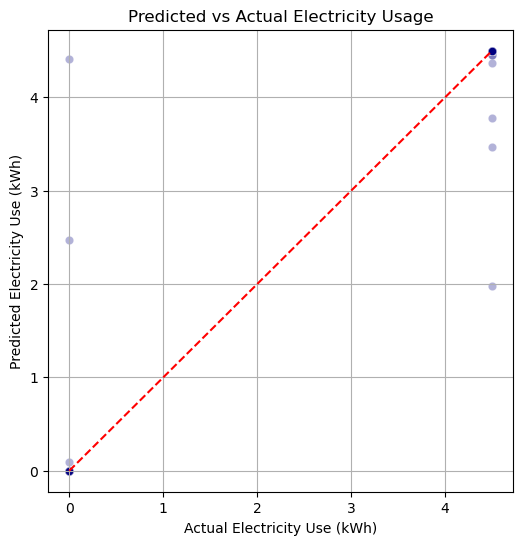

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, color="navy")
plt.xlabel("Actual Electricity Use (kWh)")
plt.ylabel("Predicted Electricity Use (kWh)")
plt.title("Predicted vs Actual Electricity Usage")
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red')
plt.grid(True)
plt.show()


In [7]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_absolute_error')

print(f"Cross-Validated MAE: {-cv_scores.mean():.3f} kWh")


Cross-Validated MAE: 0.005 kWh
